In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

%matplotlib inline

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def visualize_model(model, dataloader, num_images=6, device=None, classes=['Innerwear Vests'], mt=True):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    
    class_names = dataloader.dataset.get_inv_classmap()
    class_map = dataloader.dataset.class_map

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            if device:
                inputs = inputs.to(device)
                labels = labels.to(device)

            if class_names[labels[0].item()] not in classes:
                continue

            outputs = model(inputs)
            if mt:
                outputs = outputs[0]
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                if preds[j] == labels[j]:
                    color = 'green'
                else:
                    color = 'red'
                ax.set_title('predicted: {}, actual: {}'.
                             format(class_names[preds[j].item()],
                                    class_names[labels[j].item()]),
                            color=color)
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [6]:
from src.train import *
from src.tests.util import PATH
from src.datasets.preprocess import Preprocessor

processor = Preprocessor(PATH)

dataloader_ft = DataLoader(get_dataset(processor, subsplit='ft', phase='test'), batch_size=1,
                            shuffle=True, num_workers=4)

INFO:fashion:Cleaning csv
INFO:fashion:Reading clean csv into df
INFO:fashion:Splitting into test-train
INFO:fashion:Sub-splitting based on top-20 classes
INFO:fashion:Create maps for categoires


In [7]:
model = get_ft_classifier(weight=np.arange(122), mt=True)

checkpoint = torch.load('ckpts/mt/best_val_ft.ckpt', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

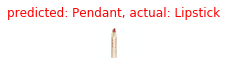

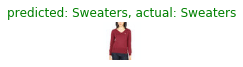

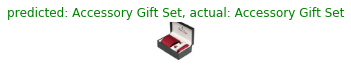

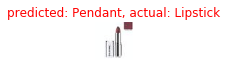

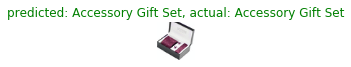

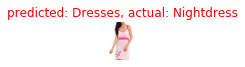

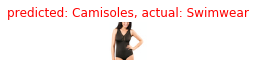

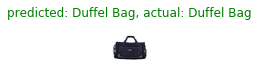

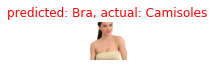

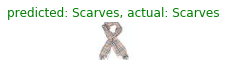

In [8]:
classes = ['Lip Plumper',
 'Accessory Gift Set',
 'Lipstick',
 'Lip Care',
 'Lehenga Choli',
 'Camisoles',
 'Nightdress',
 'Sweaters',
 'Shoe Accessories',
 'Leggings',
 'Duffel Bag',
 'Basketballs',
 'Stockings',
 'Messenger Bag',
 'Scarves',
 'Swimwear',
 'Footballs',
 'Rain Jacket',
 'Makeup Remover',
 'Innerwear Vests']

visualize_model(model, dataloader_ft, num_images=10, classes=classes)

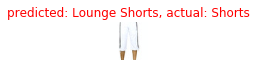

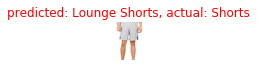

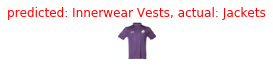

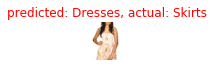

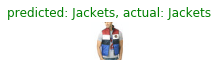

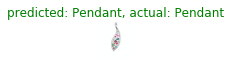

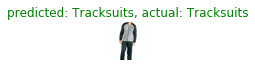

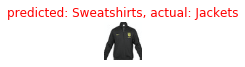

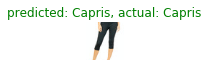

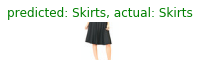

In [9]:
classes_top = ['Headband',
 'Wristbands',
 'Jewellery Set',
 'Waistcoat',
 'Umbrellas',
 'Travel Accessory',
 'Pendant',
 'Churidar',
 'Jackets',
 'Shorts',
 'Mufflers',
 'Gloves',
 'Skirts',
 'Dupatta',
 'Trousers',
 'Stoles',
 'Tracksuits',
 'Capris',
 'Bracelet',
 'Bangle']

visualize_model(model, dataloader_ft, num_images=10, classes=classes_top)

In [43]:
from collections import Counter

freqs = Counter(dataloaders_ft['test'].dataset.label_arr)

In [54]:
class_map = dataloaders_ft['test'].dataset.class_map
mapped_keys = [class_map[x] for x in freqs.keys()]
values = list(freqs.values())

print(len(values), len(mapped_keys))

102 102


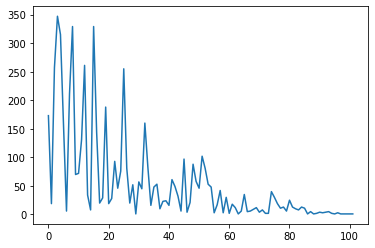

In [60]:
plt.plot(values)